# Chapter 4

## Figure 4.1, 4.2, and 4.3

Steady states and phase plots in an assymetric network

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
using LinearAlgebra
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
@parameters k_1 k_2 k_3 k_4 k_5 n
@variables t A(t) B(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [4]:
eqs = [ D(A) ~ k_1 * hill(1, B, n) - (k_3 + k_5)* A,
        D(B) ~ k_2 + k_5 * A - k_4 * B]
@named sys = ODESystem(eqs)

Model sys with 2 equations
States (2):
  A(t)
  B(t)
Parameters (6):
  k_5
  k_1
  n
  k_3
  k_2
  k_4

In [5]:
params = Dict(k_1=>20.0, k_2=>5.0, k_3=>5.0, k_4=>5.0, k_5=>2.0, n=>4)

u0s = (Dict(A=>0.0, B=>0.0), 
       Dict(A=>0.5, B=>0.6),
       Dict(A=>0.17, B=>1.1),
       Dict(A=>0.25, B=>1.9),
       Dict(A=>1.85, B=>1.70))

tend = 1.5

1.5

In [6]:
sols = map(u0s) do u0
    prob = ODEProblem(sys, u0, tend, params)
    sol = solve(prob)
end;

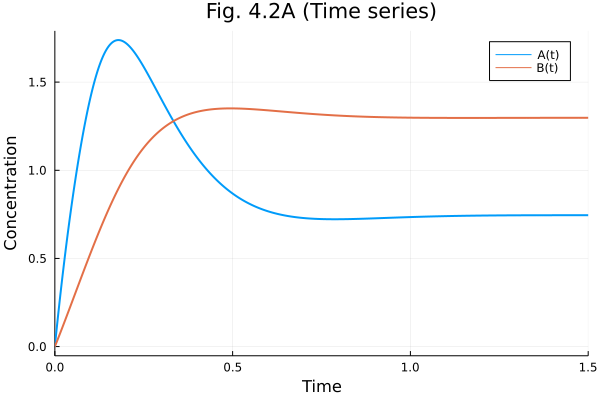

In [7]:
plot(sols[1], xlabel="Time", ylabel="Concentration", title="Fig. 4.2A (Time series)")

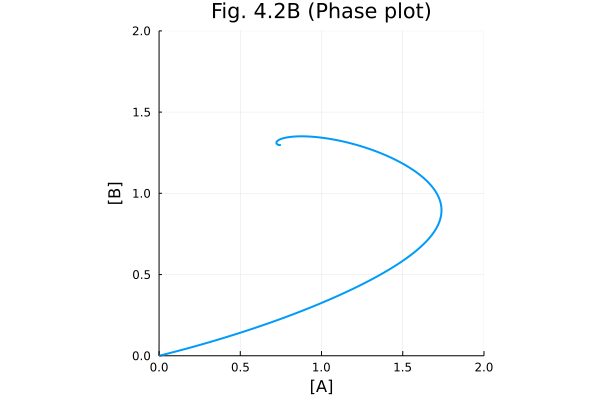

In [8]:
plot(sols[1], vars=(1, 2), xlabel="[A]", ylabel="[B]", aspect_ratio=:equal,
     title="Fig. 4.2B (Phase plot)", ylims=(0.0, 2.0), xlims=(0.0, 2.0), 
     legend=nothing)

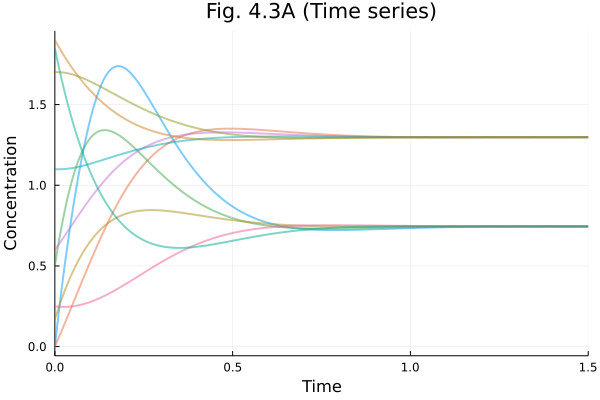

In [9]:
p3 = plot()
	
for sol in sols
    plot!(p3, sol, linealpha=0.5, legend = nothing)
end

plot!(p3, xlabel="Time", ylabel="Concentration", title="Fig. 4.3A (Time series)")

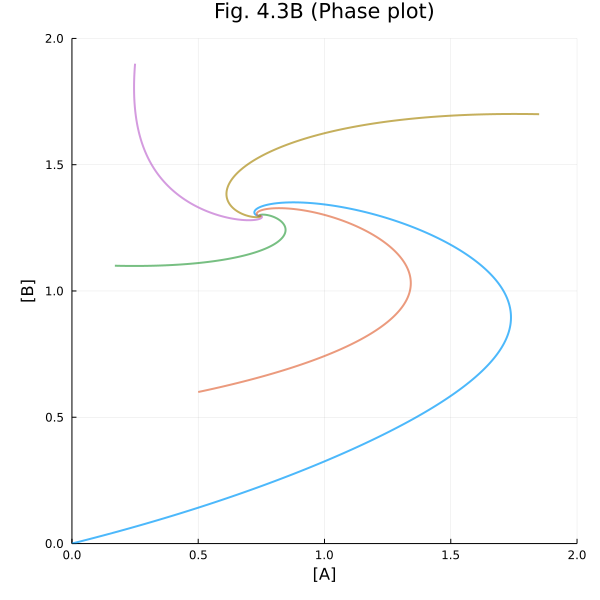

In [10]:
p4 = plot()
for sol in sols
    plot!(p4, sol, vars=(1, 2), linealpha=0.7, legend = nothing)
end
plot!(p4, aspect_ratio=:equal, title="Fig. 4.3B (Phase plot)", xlabel="[A]", ylabel="[B]", ylims=(0.0, 2.0), xlims=(0.0, 2.0), size=(600, 600))

## Figure 4.4, 4.5 

Vector fields

In [11]:
# Nullclines

nullcline_a(b) = params[k_1] / (params[k_5] + params[k_4])  * hill(1, b, params[n])
nullcline_b(b) = (params[k_4]*b - params[k_2]) / params[k_5]

nullcline_b (generic function with 1 method)

In [12]:
rhs = [x.rhs for x in collect(eqs)]

2-element Vector{SymbolicUtils.Add{Real, Int64, Dict{Any, Number}, Nothing}}:
 (k_1*(1^n)) / (1^n + B(t)^n) - (k_3 + k_5)*A(t)
 k_2 + k_5*A(t) - k_4*B(t)

In [13]:
oop, iip = eval.(ModelingToolkit.build_function(rhs, [A, B], [k_1, k_2, k_3, k_4, k_5, n], t))

(var"#5#6"(), var"#7#8"())

In [14]:
oop([0, 0], [20, 5, 5, 5, 2, 4], 0.0)

2-element Vector{Float64}:
 20.0
  5.0

In [15]:
# function for vector field
function ∂F(x, y, params; scale=20)
	du = oop([x, y], params, 0.0)
	return du ./ (norm(du)^0.5 * scale)
end

∂F (generic function with 1 method)

In [16]:
# Mesh points
xx = [x for y in 0.0:0.1:2.0, x in 0.0:0.1:2.0];
yy = [y for y in 0.0:0.1:2.0, x in 0.0:0.1:2.0];

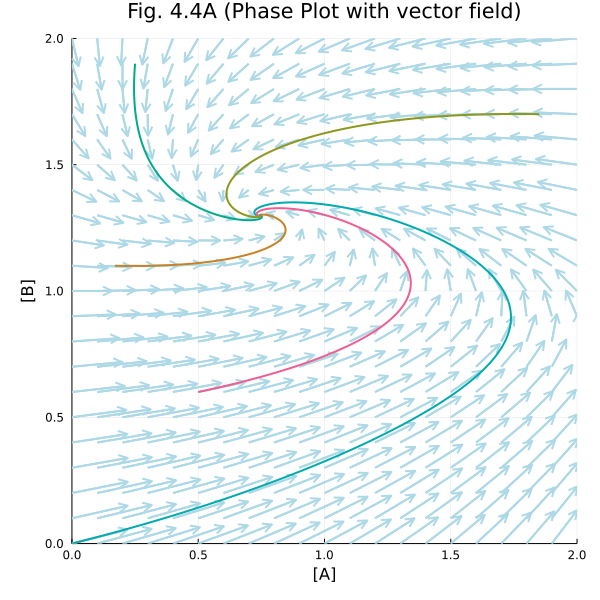

In [17]:
p1 = quiver(xx, yy, quiver=(x, y)->∂F(x, y, [20, 5, 5, 5, 2, 4]), line=(:lightblue))
for sol in sols
    plot!(p1, sol, vars=(1, 2), legend = nothing)
end

plot!(p1, aspect_ratio=:equal, title="Fig. 4.4A (Phase Plot with vector field)", 
  xlabel="[A]", ylabel="[B]", xlim=(0.0, 2.0), ylim=(0.0, 2.0), size=(600, 600))

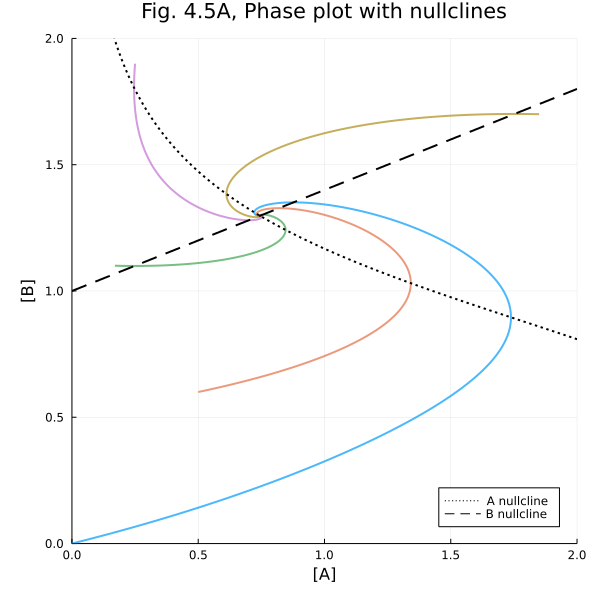

In [18]:
# Figure 4.5A
p45a = plot(aspect_ratio=:equal, title="Fig. 4.5A, Phase plot with nullclines")

# Phase plots
for sol in sols
    plot!(p45a, sol, vars=(1, 2), linealpha=0.7, lab=nothing)
end

# Parametric plotting for nullcline
plot!(p45a, nullcline_a, identity, 0.0, 2.0, label="A nullcline", line=(:black, :dot))
plot!(p45a, nullcline_b, identity, 0.0, 2.0, label="B nullcline", line=(:black, :dash))
plot!(p45a, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600), xlabel="[A]", ylabel="[B]")

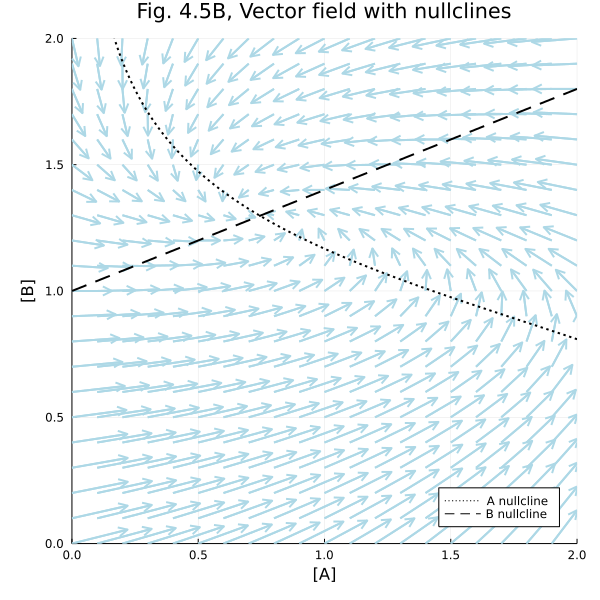

In [19]:
p45b = quiver(xx, yy, quiver=(x, y)->∂F(x, y, [20, 5, 5, 5, 2, 4]), line=(:lightblue), title="Fig. 4.5B, Vector field with nullclines", xlabel="[A]", ylabel="[B]")
plot!(p45b, nullcline_a, identity, 0.0, 2.0, label="A nullcline", line=(:black, :dot))
plot!(p45b, nullcline_b, identity, 0.0, 2.0, label="B nullcline", line=(:black, :dash))
plot!(p45b, aspect_ratio=1.0, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600))

## Figure 4.7, 4.8, 4.9, and 4.19A

Symmetric (bistable) biological networks.

In [20]:
using DifferentialEquations
using ModelingToolkit
using Plots
using LinearAlgebra
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [21]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [22]:
# Model of symmetric network from Figure 4.6. This code generates Figures 4.7, 4.8, 4.9, and 4.19A

@parameters k_1 k_2 k_3 k_4 n_1 n_2
@variables t A(t) B(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [23]:
eqs = [ D(A) ~ k_1 * hill(1, B, n_2) - k_3 * A,
        D(B) ~ k_2 * hill(1, A, n_1) - k_4 * B]
@named sys = ODESystem(eqs)

Model sys with 2 equations
States (2):
  A(t)
  B(t)
Parameters (6):
  k_1
  k_3
  n_2
  k_2
  k_4
  n_1

In [24]:
rhs = [x.rhs for x in collect(eqs)]
oop, iip = eval.(ModelingToolkit.build_function(rhs, [A, B], [k_1, k_2, k_3, k_4, n_1, n_2], t))

(var"#20#21"(), var"#22#23"())

In [25]:
params = Dict(k_1=>20.0, k_2=>20.0, k_3=>5.0, k_4=>5.0, n_1=>1.0, n_2=>4.0)

Dict{Num, Float64} with 6 entries:
  k_1 => 20.0
  k_2 => 20.0
  k_4 => 5.0
  k_3 => 5.0
  n_1 => 1.0
  n_2 => 4.0

In [26]:
function ∂F(x, y, params; scale=20)
	du = oop([x, y], params, 0.0)
	# Tweaking arrow length
	return du ./ (norm(du)^0.5 * scale)
end

∂F (generic function with 1 method)

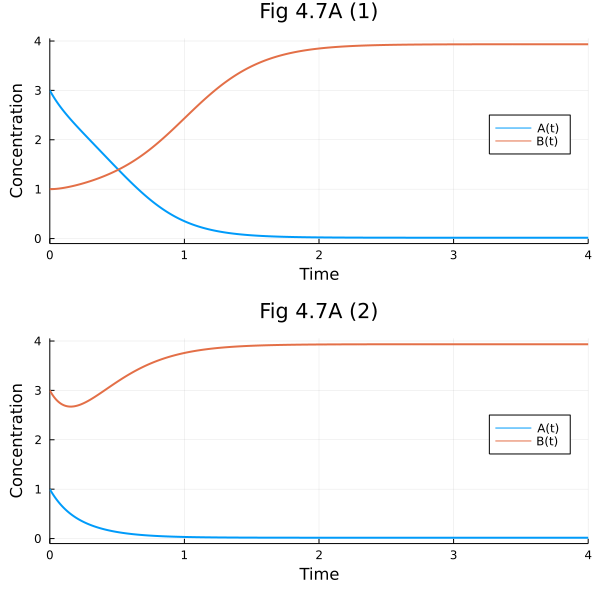

In [27]:
tend = 4.0
sol1 = solve(ODEProblem(sys, [A=>3.0, B=>1.0], tend, params))
sol2 = solve(ODEProblem(sys, [A=>1.0, B=>3.0], tend, params))

p1 = plot(sol1, xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.7A (1)")
p2 = plot(sol2, xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.7A (2)")
fig47a = plot(p1, p2, layout=(2, 1), size=(600, 600))

In [28]:
nullclineS1(B) = params[k_1] / params[k_3] * hill(1, B, params[n_2])
nullclineS2(A) = params[k_2] / params[k_4] * hill(1, A, params[n_1])

nullclineS2 (generic function with 1 method)

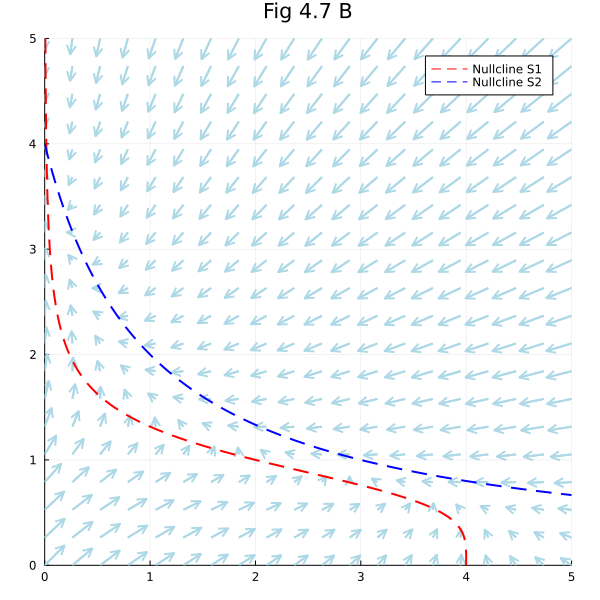

In [29]:
r = LinRange(0.0, 5.0, 20)
xx = [x for y in r, x in r]
yy = [y for y in r, x in r]

pl = quiver(xx, yy, quiver=(x,y)->∂F(x, y, [20, 20, 5, 5, 1, 4]), line=(:lightblue))

plot!(pl, nullclineS1, identity, 0.0, 5.0, lab="Nullcline S1", line=(:dash, :red))
plot!(pl, identity, nullclineS2, 0.0, 5.0, lab="Nullcline S2", line=(:dash, :blue))
plot!(pl, title="Fig 4.7 B", xlim=(0.0, 5.0), ylim=(0.0, 5.0), aspect_ratio = 1.0, size = (600, 600))

In [30]:
# Symmetric inhibition
params = Dict(k_1=>20.0, k_2=>20.0, k_3=>5.0, k_4=>5.0, n_1=>4.0, n_2=>4.0)

Dict{Num, Float64} with 6 entries:
  k_1 => 20.0
  k_2 => 20.0
  k_4 => 5.0
  k_3 => 5.0
  n_1 => 4.0
  n_2 => 4.0

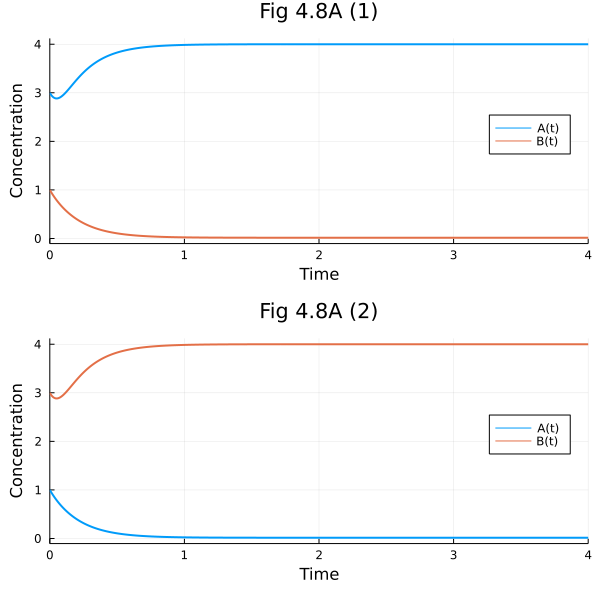

In [31]:
tend = 4.0
sol1 = solve(ODEProblem(sys, [A=>3.0, B=>1.0], tend, params))
sol2 = solve(ODEProblem(sys, [A=>1.0, B=>3.0], tend, params))

pl1 = plot(sol1, xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.8A (1)")
pl2 = plot(sol2, xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.8A (2)")
fig48a = plot(pl1, pl2, layout=(2, 1), size=(600, 600))

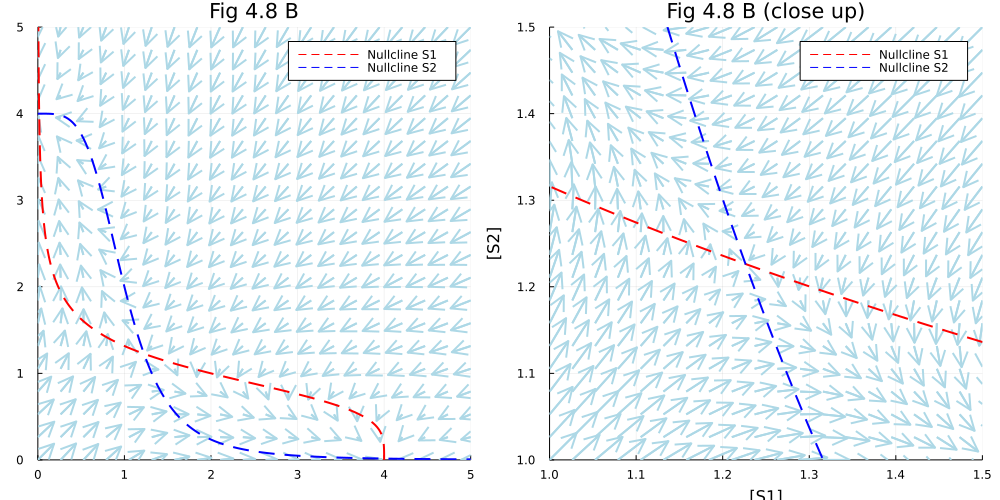

In [32]:
∂F2(x, y) = ∂F(x, y, [20, 20, 5, 5, 4, 4])

r = LinRange(0.0, 5.0, 20)
xx = [x for y in r, x in r]
yy = [y for y in r, x in r]

pl1 = quiver(xx, yy, quiver=∂F2, line=(:lightblue))
plot!(pl1, nullclineS1, identity, r[1], r[end], lab="Nullcline S1", line=(:dash, :red))
plot!(pl1, identity, nullclineS2, r[1], r[end], lab="Nullcline S2", line=(:dash, :blue))
plot!(pl1, title="Fig 4.8 B", xlim=(r[1], r[end]), ylim=(r[1], r[end]), aspect_ratio = :equal)

r2 = LinRange(1.0, 1.5, 20)
xx2 = [x for y in r2, x in r2]
yy2 = [y for y in r2, x in r2]

pl2 = quiver(xx2, yy2, quiver=(x, y) -> ∂F2(x,y) ./ 3, line=(:lightblue))
	
plot!(pl2, nullclineS1, identity, r2[1], r2[end], lab="Nullcline S1", line=(:dash, :red))
plot!(pl2, identity, nullclineS2, r2[1], r2[end], lab="Nullcline S2", line=(:dash, :blue))
plot!(pl2, title="Fig 4.8 B (close up)", xlim=(r2[1], r2[end]), ylim=(r2[1], r2[end]), aspect_ratio = :equal, xlabel="[S1]", ylabel="[S2]")

plot(pl1, pl2, size=(1000, 500))

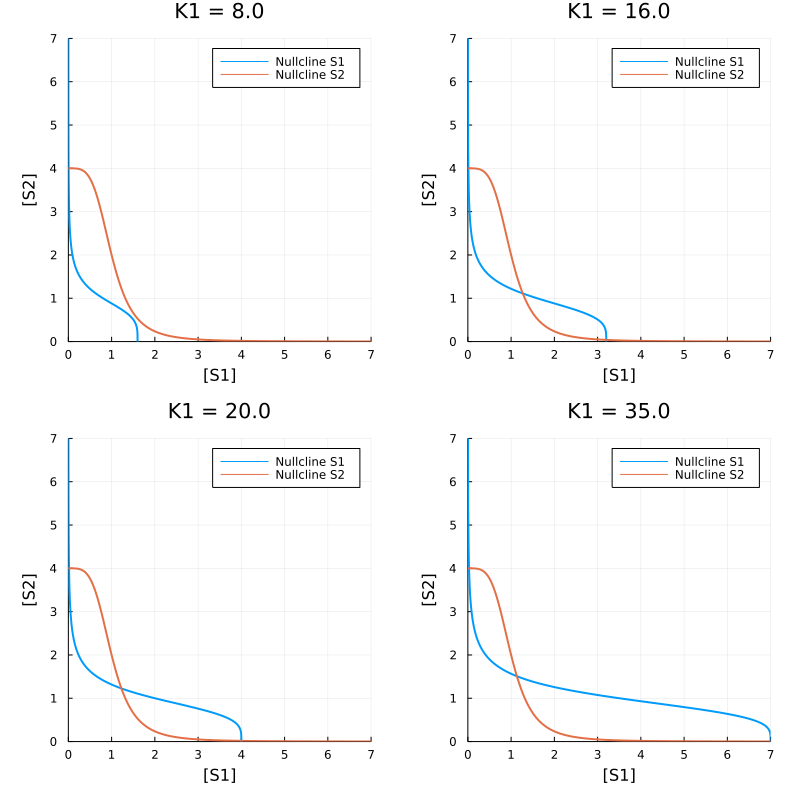

In [33]:
pls = map((8.0, 16.0, 20.0, 35.0)) do k1
    params[k_1] = k1
    plot(nullclineS1, identity, 0.0, 7.0, lab="Nullcline S1")
    plot!(identity, nullclineS2, 0.0, 7.0, lab="Nullcline S2")
    plot!(title = "K1 = $k1", xlim=(0.0, 7.0), ylim=(0.0, 7.0), 
      aspect_ratio = 1.0, size = (800, 800), xlabel="[S1]", ylabel="[S2]")
end

params[k_1] = 20

plot(pls...)

## Figure 4.11

Surface plots.

Reference: [surface plots @ PlotsGallery.jl](https://goropikari.github.io/PlotsGallery.jl/src/surface.html)

In [34]:
using Plots
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

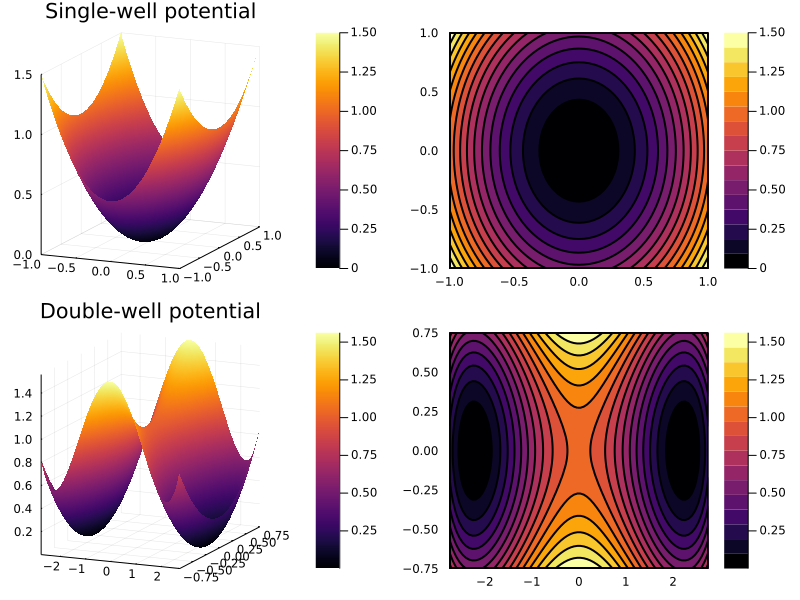

In [35]:
z1(x, y) = x^2 + 0.5y^2
z2(x, y) = (.2x^2-1)^2 + y^2
x1 = y1 = range(-1.0, 1.0, length=51)
x2 = range(-2.75, 2.75, length=80)
y2 = range(-0.75, 0.75, length=80)
p1 = surface(x1, y1, z1, title="Single-well potential")
p2= contourf(x1, y1, z1)
p3 = surface(x2, y2, z2, title="Double-well potential")
p4 = contourf(x2, y2, z2)

plot(p1, p2, p3, p4,size=(800, 600))

## Figure 4.15, 4.16, and 4.17

Oscillatory network.

In [36]:
using DifferentialEquations
using ModelingToolkit
using Plots
using LinearAlgebra
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [37]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [38]:
# Model of oscillatory network from Figure 4.14. This code generates Figures 4.15, 4.16, and 4.17
@parameters k_0 k_1 k_2 n
@variables t A(t) B(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [39]:
eqs = [D(A) ~ k_0 - k_1 * A * ( 1 + B^n),
       D(B) ~ k_1 * A * ( 1 + B^n) - k_2 * B]

# Secure positions of state variable and parameters 
@named sys = ODESystem(eqs, t, [A, B], [k_0, k_1, k_2, n])

Model sys with 2 equations
States (2):
  A(t)
  B(t)
Parameters (4):
  k_0
  k_1
  k_2
  n

In [40]:
rhs = [x.rhs for x in collect(eqs)]
oop, iip = eval.(ModelingToolkit.build_function(rhs, [A, B], [k_0, k_1, k_2, n], t))

function figure0415(; param = (K0 = 8.0, K1 = 1.0, K2 = 5.0, N = 2),
	                  r = LinRange(0.0, 4.0, 20),
	                  tend = 8.0,
	                  figtitle="Fig 4.15")

	u0s = ( [A=>1.5, B=>1.0], [A=>0.0, B=>1.0],
        	[A=>0.0, B=>3.0], [A=>2.0, B=>0.0])

	sols = map(u0s) do u0
		prob = ODEProblem(sys, u0, tend, (k_0=>param.K0, k_1=>param.K1, k_2=>param.K2, n=>param.N))
		sol = solve(prob)
	end

	# Fig 4.15 A
	p1 = plot(sols[1], xlabel="Time", ylabel="Concentration", title ="$figtitle (A)", xlims=(0.0, 8.0))
	
	# Fig 4.15 B: Vetor field
	function ∂F(x, y; scale=20)
		dxdy = oop([x, y], values(param), 0)
		return dxdy ./ (hypot(x, y)^0.5 * scale)
	end
	
	nullcline_s1(s2, p=param) = (p.K0 / p.K1) * hill(1, s2, p.N)
	nullcline_s2(s2, p=param) = (p.K2 * s2) / (p.K1 * (1 + s2^p.N))
	
	
	xx = [x for y in r, x in r]
	yy = [y for y in r, x in r]
	p2 = quiver(xx, yy, quiver=∂F, line=(:lightblue))

	for sol in sols
		plot!(p2, sol, vars=(1, 2), label=nothing)
	end
	
	rMin, rMax = r[1], r[end]
	
	plot!(p2, nullcline_s1, identity, rMin, rMax, label="Nullcline A", line=(:dash, :red))
	plot!(p2, nullcline_s2, identity, rMin, rMax, label="Nullcline B", line=(:dash, :blue))
	plot!(p2, title = "$figtitle (B)", xlabel="[A]", ylabel="[B]", 
      xlims=(rMin, rMax), ylims=(rMin, rMax), aspect_ratio=:equal, size=(700, 700))
	
	return (p1, p2)
end

figure0415 (generic function with 1 method)

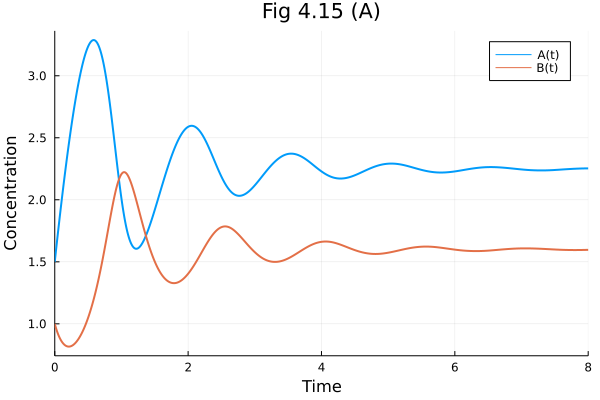

In [41]:
fig415a, fig415b = figure0415()
fig415a

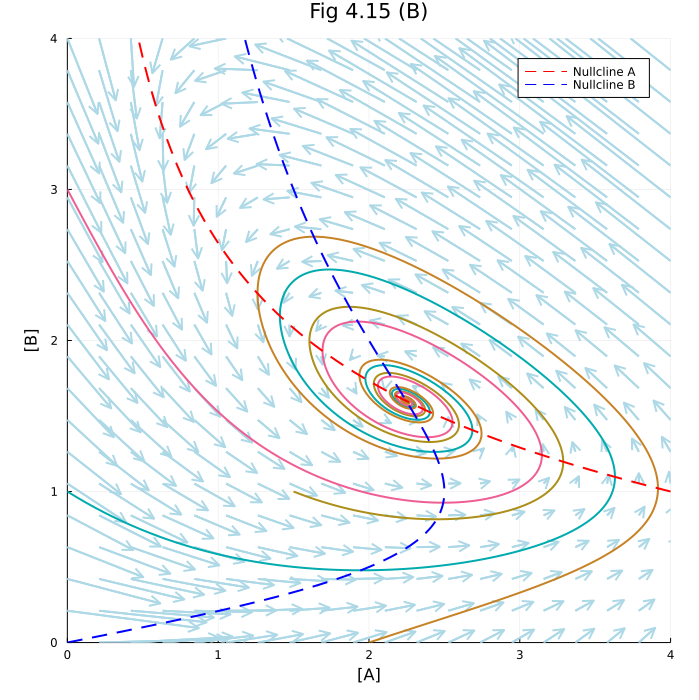

In [42]:
fig415b

In [43]:
fig416a, fig416b = figure0415(param = (K0 = 8.0, K1 = 1.0, K2 = 5.0, N = 2.5), tend = 1000.0, figtitle="Fig 4.16")

(Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=26})

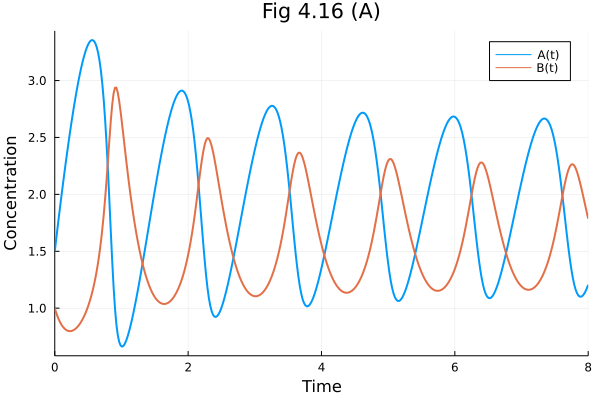

In [44]:
fig416a

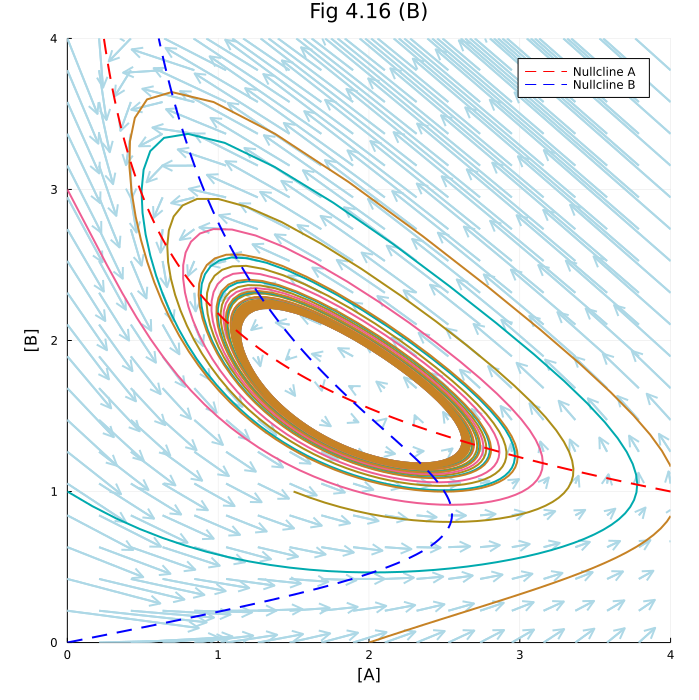

In [45]:
fig416b

In [46]:
prob = ODEProblem(sys, [A=>2.0, B=>1.5], 10.0, (k_0=>8, k_1=>1, k_2=>5, n=>2.5))

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 2.0
 1.5

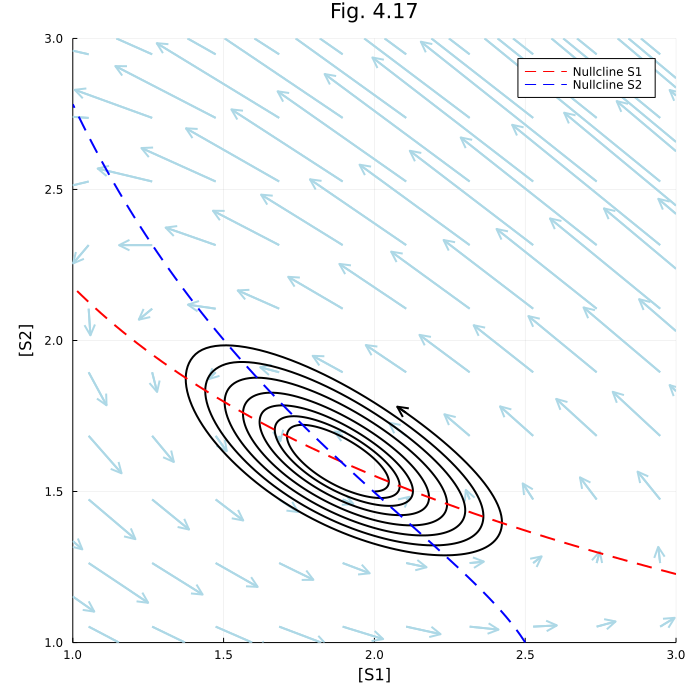

In [47]:
param = (K0 = 8.0, K1 = 1.0, K2 = 5.0, N = 2.5)

sol417 = solve(ODEProblem(sys, [A=>2.0, B=>1.5], 10.0, (k_0=>param.K0, k_1=>param.K1, k_2=>param.K2, n=>param.N)))

r = LinRange(0.0, 4.0, 20)
xx = [x for y in r, x in r]
yy = [y for y in r, x in r]

"Vetor field"
function ∂F(x, y; scale=20)
    dxdy = oop([x, y], values(param), 0)
    return dxdy ./ (hypot(x, y)^0.5 * scale)
end

nullcline_s1(s2, p=param) = (p.K0 / p.K1) * hill(1, s2, p.N)
nullcline_s2(s2, p=param) = (p.K2 * s2) / (p.K1 * (1 + s2^p.N))

xx = [x for y in r, x in r]
yy = [y for y in r, x in r]

quiver(xx, yy, quiver=∂F, line=(:lightblue))
plot!(sol417, vars=(1, 2), label=nothing, line=(:black), arrow=0.4)


plot!(nullcline_s1, identity, 0.0, 4.0, label="Nullcline S1", line=(:dash, :red))
plot!(nullcline_s2, identity, 0.0, 4.0, label="Nullcline S2", line=(:dash, :blue))
plot!(title = "Fig. 4.17", xlabel="[S1]", ylabel="[S2]", 
      xlims=(1.0, 3.0), ylims=(1.0, 3.0), aspect_ratio=:equal, size=(700, 700))

## Figure 4.18 Continuation diagram

**NOTE**

[Bifurcations.jl](https://github.com/tkf/Bifurcations.jl) does not work (As I am writing this). 
And [BifurcationKit.jl](https://github.com/rveltz/BifurcationKit.jl) might be too complex for this example.

In [48]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [49]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [50]:
@variables t A(t) B(t)
@parameters k_1, k_2, k_3, k_4, k_5, n

D = Differential(t)

(::Differential) (generic function with 2 methods)

In [51]:
eqs = [ D(A) ~ k_1 * hill(1, B, n) - (k_5 + k_3) * A,
        D(B) ~ k_2 + k_5 * A - k_4 * B]

@named sys = ODESystem(eqs, t, [A, B], [k_1, k_2, k_3, k_4, k_5, n])

Model sys with 2 equations
States (2):
  A(t)
  B(t)
Parameters (6):
  k_1
  k_2
  k_3
  k_4
  k_5
  n

In [52]:
params = Dict(k_1 => 20.0, k_2 => 5.0, k_3 => 5.0, k_4 => 5.0, k_5 => 2.0, n => 4)
u0 = [A=>0.0, B=>0.0]

2-element Vector{Pair{Num, Float64}}:
 A(t) => 0.0
 B(t) => 0.0

In [53]:
# Could also use ensemble analysis: https://diffeq.sciml.ai/stable/features/ensemble/
a = map(LinRange(0.0, 1000.0, 50)) do k1
    p = copy(params)
    p[k_1] = k1
	prob = SteadyStateProblem(sys, u0, p)
	sol = solve(prob, DynamicSS(Rodas5()))
	sol[1]
end

50-element Vector{Float64}:
 0.0
 0.7535911916033505
 1.100104683698493
 1.3363326214169509
 1.5188534281751944
 1.6690616788184645
 1.7974922922968057
 1.9101564713122494
 2.010828608162476
 2.102042173747496
 2.1855863341931894
 2.2627741255659153
 2.334599142816756
 ⋮
 3.418394953078545
 3.4458810579240997
 3.472811343554154
 3.4992104237870896
 3.5251013850256365
 3.550505745107851
 3.5754436058686996
 3.5999340342192006
 3.6239942859126097
 3.64764156655936
 3.6708910118911287
 3.6937571853380256

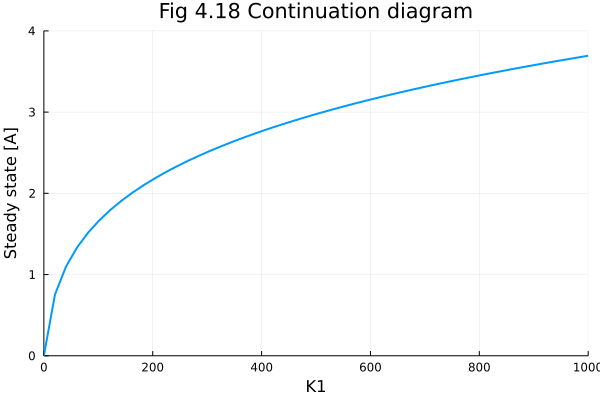

In [54]:
plot(LinRange(0.0, 1000.0, 50), a, title = "Fig 4.18 Continuation diagram", 
     xlabel = "K1" , ylabel= "Steady state [A]", 
     legend=nothing, ylim=(0.0, 4.0), xlim=(0, 1000))

## Figure 4.22 Tangent line

In [55]:
using Plots
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

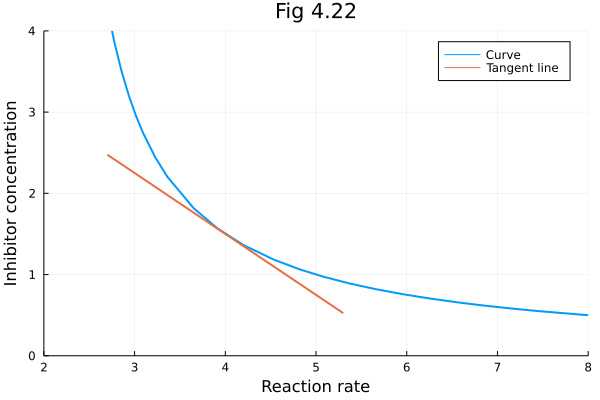

In [56]:
curve(t) = 3 / (t-2)
tange(t) = 1.5 - (t - 4) * 0.75

plot(curve, 2.2, 8.0, lab="Curve")
plot!(tange, 2.7, 5.3, lab="Tangent line")
plot!(title="Fig 4.22", xlabel="Reaction rate", ylabel="Inhibitor concentration", 
      xlims=(2.0, 8.0), ylims=(0.0, 4.0))